Reproduction of the experiment from Fig 1

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import cvxpy as cp

# Quantile Loss

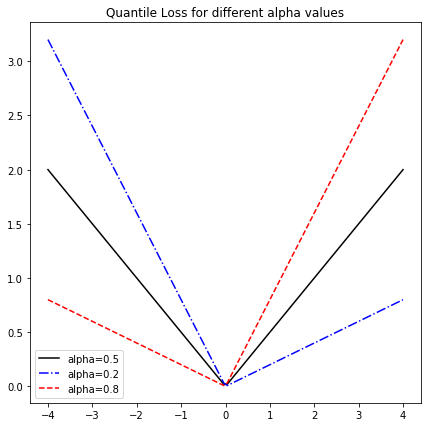

In [18]:
quantile_loss = lambda x, alpha=0.5: x*(alpha - (x<0))

plt.figure(figsize=(7,7))

x = np.linspace(-4,4,100)
plt.plot(x, quantile_loss(x), c="black", label="alpha=0.5")
plt.plot(x, quantile_loss(x,0.2), "b-.", label="alpha=0.2")
plt.plot(x, quantile_loss(x,0.8), "r--", label="alpha=0.8")

plt.title("Quantile Loss for different alpha values")

plt.legend()

plt.show()

# Generic Data

In [106]:
nsample = 40
sigma = np.sqrt(0.25)

X = 2*np.random.random(nsample) - 1
e = sigma*np.random.randn(nsample)
y = X + e

theoretical_quantile = lambda x,alpha=0.5,sigma=1: sigma*norm().ppf(alpha) + x

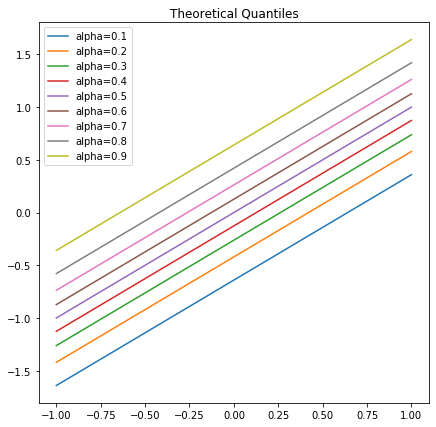

In [107]:
alpha_l = np.arange(0.1,1,0.1)
x = np.linspace(-1,1,100)

plt.figure(figsize=(7,7))

for alpha in alpha_l:
    plt.plot(x, theoretical_quantile(x,alpha,sigma), label="alpha={}".format(np.round(alpha,2)))

plt.title("Theoretical Quantiles")
plt.legend()
plt.show()

# Kernel Quantile Regression


The optimal value is 1.5279043548743043

The optimal value is 2.9699811162487615

The optimal value is 4.158845545714183

The optimal value is 5.151535909698947

The optimal value is 5.758395371038392

The optimal value is 5.919354446839337

The optimal value is 5.441943047095695

The optimal value is 4.608695706406237

The optimal value is 2.6361008389558953


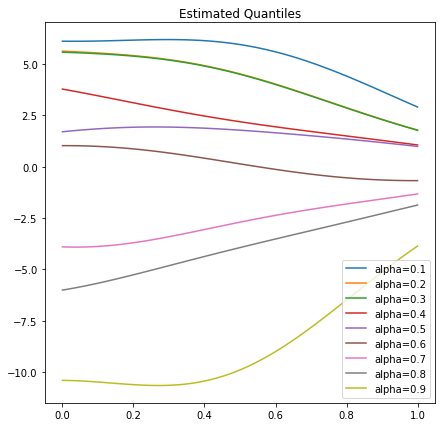

In [108]:
gauss_kernel = lambda x,y,signa=1: np.exp(-np.sum((x-y)**2)/sigma**2)
#K_left = lambda x, K, sigma: np.array([gauss_kernel(x,X[i]) for i in range(nsample)]) 
quantile_sol = lambda x,w: np.sum([w[i]*gauss_kernel(x,X[i]) for i in range(nsample)])

lambd = 0.001


K = np.zeros((nsample,nsample))
for i in range(nsample):
    for j in range(nsample):
        K[i,j] = gauss_kernel(X[i],X[j],sigma)

alpha_l = np.arange(0.1,1,0.1)

# Generate a random non-trivial quadratic program.
m = 4*nsample
n = 4*nsample
p = nsample

np.random.seed(1)

P = np.zeros((n,n))
P[0:nsample,0:nsample] = K
P[0:nsample,nsample:2*nsample] = -K
P[nsample:2*nsample,0:nsample] = -K
P[nsample:2*nsample,nsample:2*nsample] = K
P = P

G = -np.eye(n)

h = np.zeros(n)

A = np.hstack([K,-K,np.eye(nsample),-np.eye(nsample)])

b = y


abscisse = np.linspace(0,1,100)
plt.figure(figsize=(7,7))

for alpha in alpha_l:

    q = np.zeros(4*nsample)
    q[2*nsample:3*nsample] = alpha
    q[3*nsample:4*nsample] = 1-alpha

    # Define and solve the CVXPY problem.
    x = cp.Variable(n)
    prob = cp.Problem(cp.Minimize(lambd*cp.quad_form(x, P) + q.T @ x),
                     [G @ x <= h,
                      A @ x == b])
    prob.solve()

    # Print result.
    print("\nThe optimal value is", prob.value)
    #print("A solution x is")
    #print(x.value)
    #print("A dual solution corresponding to the inequality constraints is")
    #print(prob.constraints[0].dual_value)
    
    w_opt = x.value[2*nsample:3*nsample] - x.value[3*nsample:4*nsample]
    
    t = [quantile_sol(xi,w_opt) for xi in abscisse]
    plt.plot(abscisse, t, label="alpha={}".format(np.round(alpha,2)))
    
    
plt.title("Estimated Quantiles")
plt.legend()
plt.show()

# Simultaneous Multiple Kernel Quantile Regression